In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np

#### Load Iris Dataset
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print 'Dimensions:', X.shape, Y.shape
print X[0], Y[0]

Dimensions: (150L, 4L) (150L,)
[ 5.1  3.5  1.4  0.2] 0


In [14]:
pca = PCA('mle', whiten=True)
Xtr = pca.fit_transform(X)
pca.fit(X).get_covariance()

# pca.get_covariance()

array([[  2.33729808,  -0.4974243 ,   5.41816238,   2.26851462],
       [ -0.4974243 ,   0.17138743,  -1.24066941,  -0.51848031],
       [  5.41816238,  -1.24066941,  12.87498626,   5.3840349 ],
       [  2.26851462,  -0.51848031,   5.3840349 ,   2.28027424]])

#### Use PCA from sklearn
Arguments:
* **n_components** $-$ possible values integer (1,2,3,$\dots$); _'mle'_ maximum likelihood estimator; $p$, where $0 < p < 1$. If 'mle', then number of components is determined automatically using MLE approach; if $p$ is provided, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by $p$.
* **svd_solver** $-$ possible values are _auto_, _full_, _arpack_, _randomized_. If _full_, then full SVD is performed, useful when number of components is not determined (then, _n_components_ = 'mle' or $p$ can be used). If number of components, _arpack_ is more efficient since only top eignevalues is evaluated. _randomized_ is useful for large data (500+ observations, 500+dimensions) and we require more than 20% of dimensions to be reduced. _Advice:_ use 'auto' if number of components is unknown or if requirements for _randomized_ are satisfied; othewise, use _'arpack'_.
* **whiten** $-$ if True, variance of transformed data equals to one. This also makes the features to be less correlated with each other. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [22]:
pca = PCA(n_components=2, svd_solver='auto')
Xtr = pca.fit_transform(X)
print 'Original:', X[0]
print 'Transformed:', Xtr[0]
print '# components:', pca.n_components_


Original: [ 5.1  3.5  1.4  0.2]
Transformed: [-2.68420713  0.32660731]
# components: 2


In [23]:
pca = PCA(n_components='mle', svd_solver='full')
Xtr = pca.fit_transform(X)
print 'Original:', X[0]
print 'Transformed:', Xtr[0]
print '# components:', pca.n_components_

Original: [ 5.1  3.5  1.4  0.2]
Transformed: [-2.68420713  0.32660731 -0.02151184]
# components: 3


In [24]:
pca = PCA(n_components=0.9, svd_solver='full')
Xtr = pca.fit_transform(X)
print 'Original:', X[0]
print 'Transformed:', Xtr[0]
print '# components:', pca.n_components_

Original: [ 5.1  3.5  1.4  0.2]
Transformed: [-2.68420713]
# components: 1


In [26]:
pca = PCA(n_components=3, svd_solver='arpack', whiten=True)
Xtr = pca.fit_transform(X)
print 'Original:', X[0]
print 'Transformed:', Xtr[0]
print '# components:', pca.n_components_

Original: [ 5.1  3.5  1.4  0.2]
Transformed: [-1.31027769  0.665813   -0.07702453]
# components: 3


#### Return of PCA fit

In [36]:
pca = PCA(0.95, svd_solver='full', whiten=True)
fit = pca.fit(X)
print 'Pricipal Components:', fit.components_
print 'Explained Variance:', fit.explained_variance_
print 'Explained Variance Ratio:', fit.explained_variance_ratio_

Pricipal Components: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Explained Variance: [ 4.19667516  0.24062861]
Explained Variance Ratio: [ 0.92461621  0.05301557]


#### Transform data with PCA

In [39]:
pca = PCA('mle', svd_solver = 'full', whiten=True)
Xtr = pca.fit_transform(X)
Xinv = pca.inverse_transform(Xtr)
print 'Original:', X[0]
print 'Transformed:', Xtr[0]
print 'Inversed Transformed:', Xinv[0]

Original: [ 5.1  3.5  1.4  0.2]
Transformed: [-1.31027769  0.665813   -0.07702453]
Inversed Transformed: [ 5.09968079  3.50032609  1.40048267  0.19924425]


#### Case study

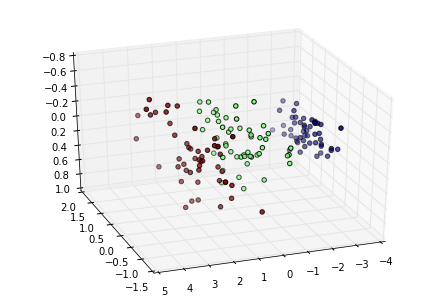

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = Axes3D(fig, elev=-150, azim=110)
pca = PCA(3, 'arpack')
Xtr = pca.fit_transform(X)
ax.scatter(Xtr[:,0], Xtr[:,1], Xtr[:, 2], c=iris.target)

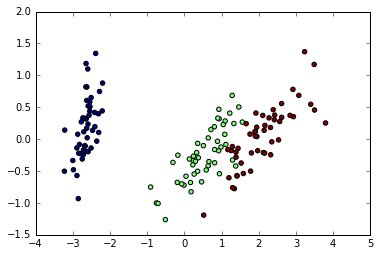

In [42]:
pca = PCA(2, 'arpack')
Xtr = pca.fit_transform(X)
fig = plt.figure(2)
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=iris.target)